In [76]:
import numpy as np

a0 = 100000
n0 = 1000
c1 = 0.0069
c2 = 0.0072
c3 = 0.0015
mu = n0 * c1
nu = n0 * c2
lam = n0 * c3
d = 1056
T = 120
F = 38400


In [77]:
# for one month

a = a0
n = n0
mu = n * c1
nu = n * c2
lam = n * c3

# n = n0 + expected increase - expected decrease
# a = a0 + (n) * pmt - (expected claims) * F

n = n0 + np.random.poisson(nu) - np.random.exponential(1/mu)
a = a0 + n*d - np.random.poisson(lam)*F
print(n)
print(a)

1010.9757005526825
1090790.3397836327


In [78]:
def R():
    success = 1
    a = a0
    n = n0
    
    for i in range(T):
        mu = n*c1
        nu = n*c2
        lam = n*c3
        n = n + np.random.poisson(nu) - np.random.exponential(mu)
        a = a + n*d - np.random.poisson(lam)*F
        if n < 0:
            print("Error: the number of people is below 0")
        else:
            if a < 0:
                success = 0
    
    return(success)

print(R())

1


In [79]:
S=0
num=100
for k in range (num):
    Y=R()
    S=S+Y
print(S)
print(S/num)

100
1.0


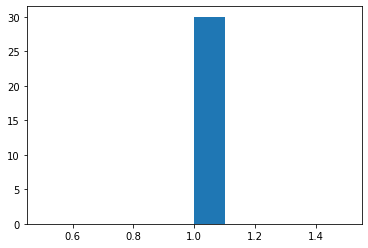

In [80]:
import matplotlib.pyplot as plt
x=np.zeros(30)
for j in range (30):
    S=0
    num=100
    for k in range (num):
        Y=R()
        S=S+Y
        x[j]=S/num
plt.hist(x, bins=10)
plt.show()